# HW1029Q4 CH04Q14

### 14. In this problem, you will develop a model to predict whether a given car gets high or low gas mileage based on the Auto data set.

##### (a) Create a binary variable, mpg01, that contains a 1 if mpg contains a value above its median, and a 0 if mpg contains a value below its median. You can compute the median using the median() method of the data frame. Note you may find it helpful to add a column mpg01 to the data frame by assignment. Assuming you have stored the data frame as Auto, this can be done as follows:  
Auto['mpg01'] = mpg01

In [1]:
import pandas as pd
from ISLP import load_data

Auto = load_data('Auto')
Auto['mpg01'] = (Auto['mpg'] > Auto['mpg'].median()).astype(int)

##### (b) Explore the data graphically in order to investigate the association between mpg01 and the other features. Which of the other features seem most likely to be useful in predicting mpg01? Scatterplots and boxplots may be useful tools to answer this que. Describe your fndings.

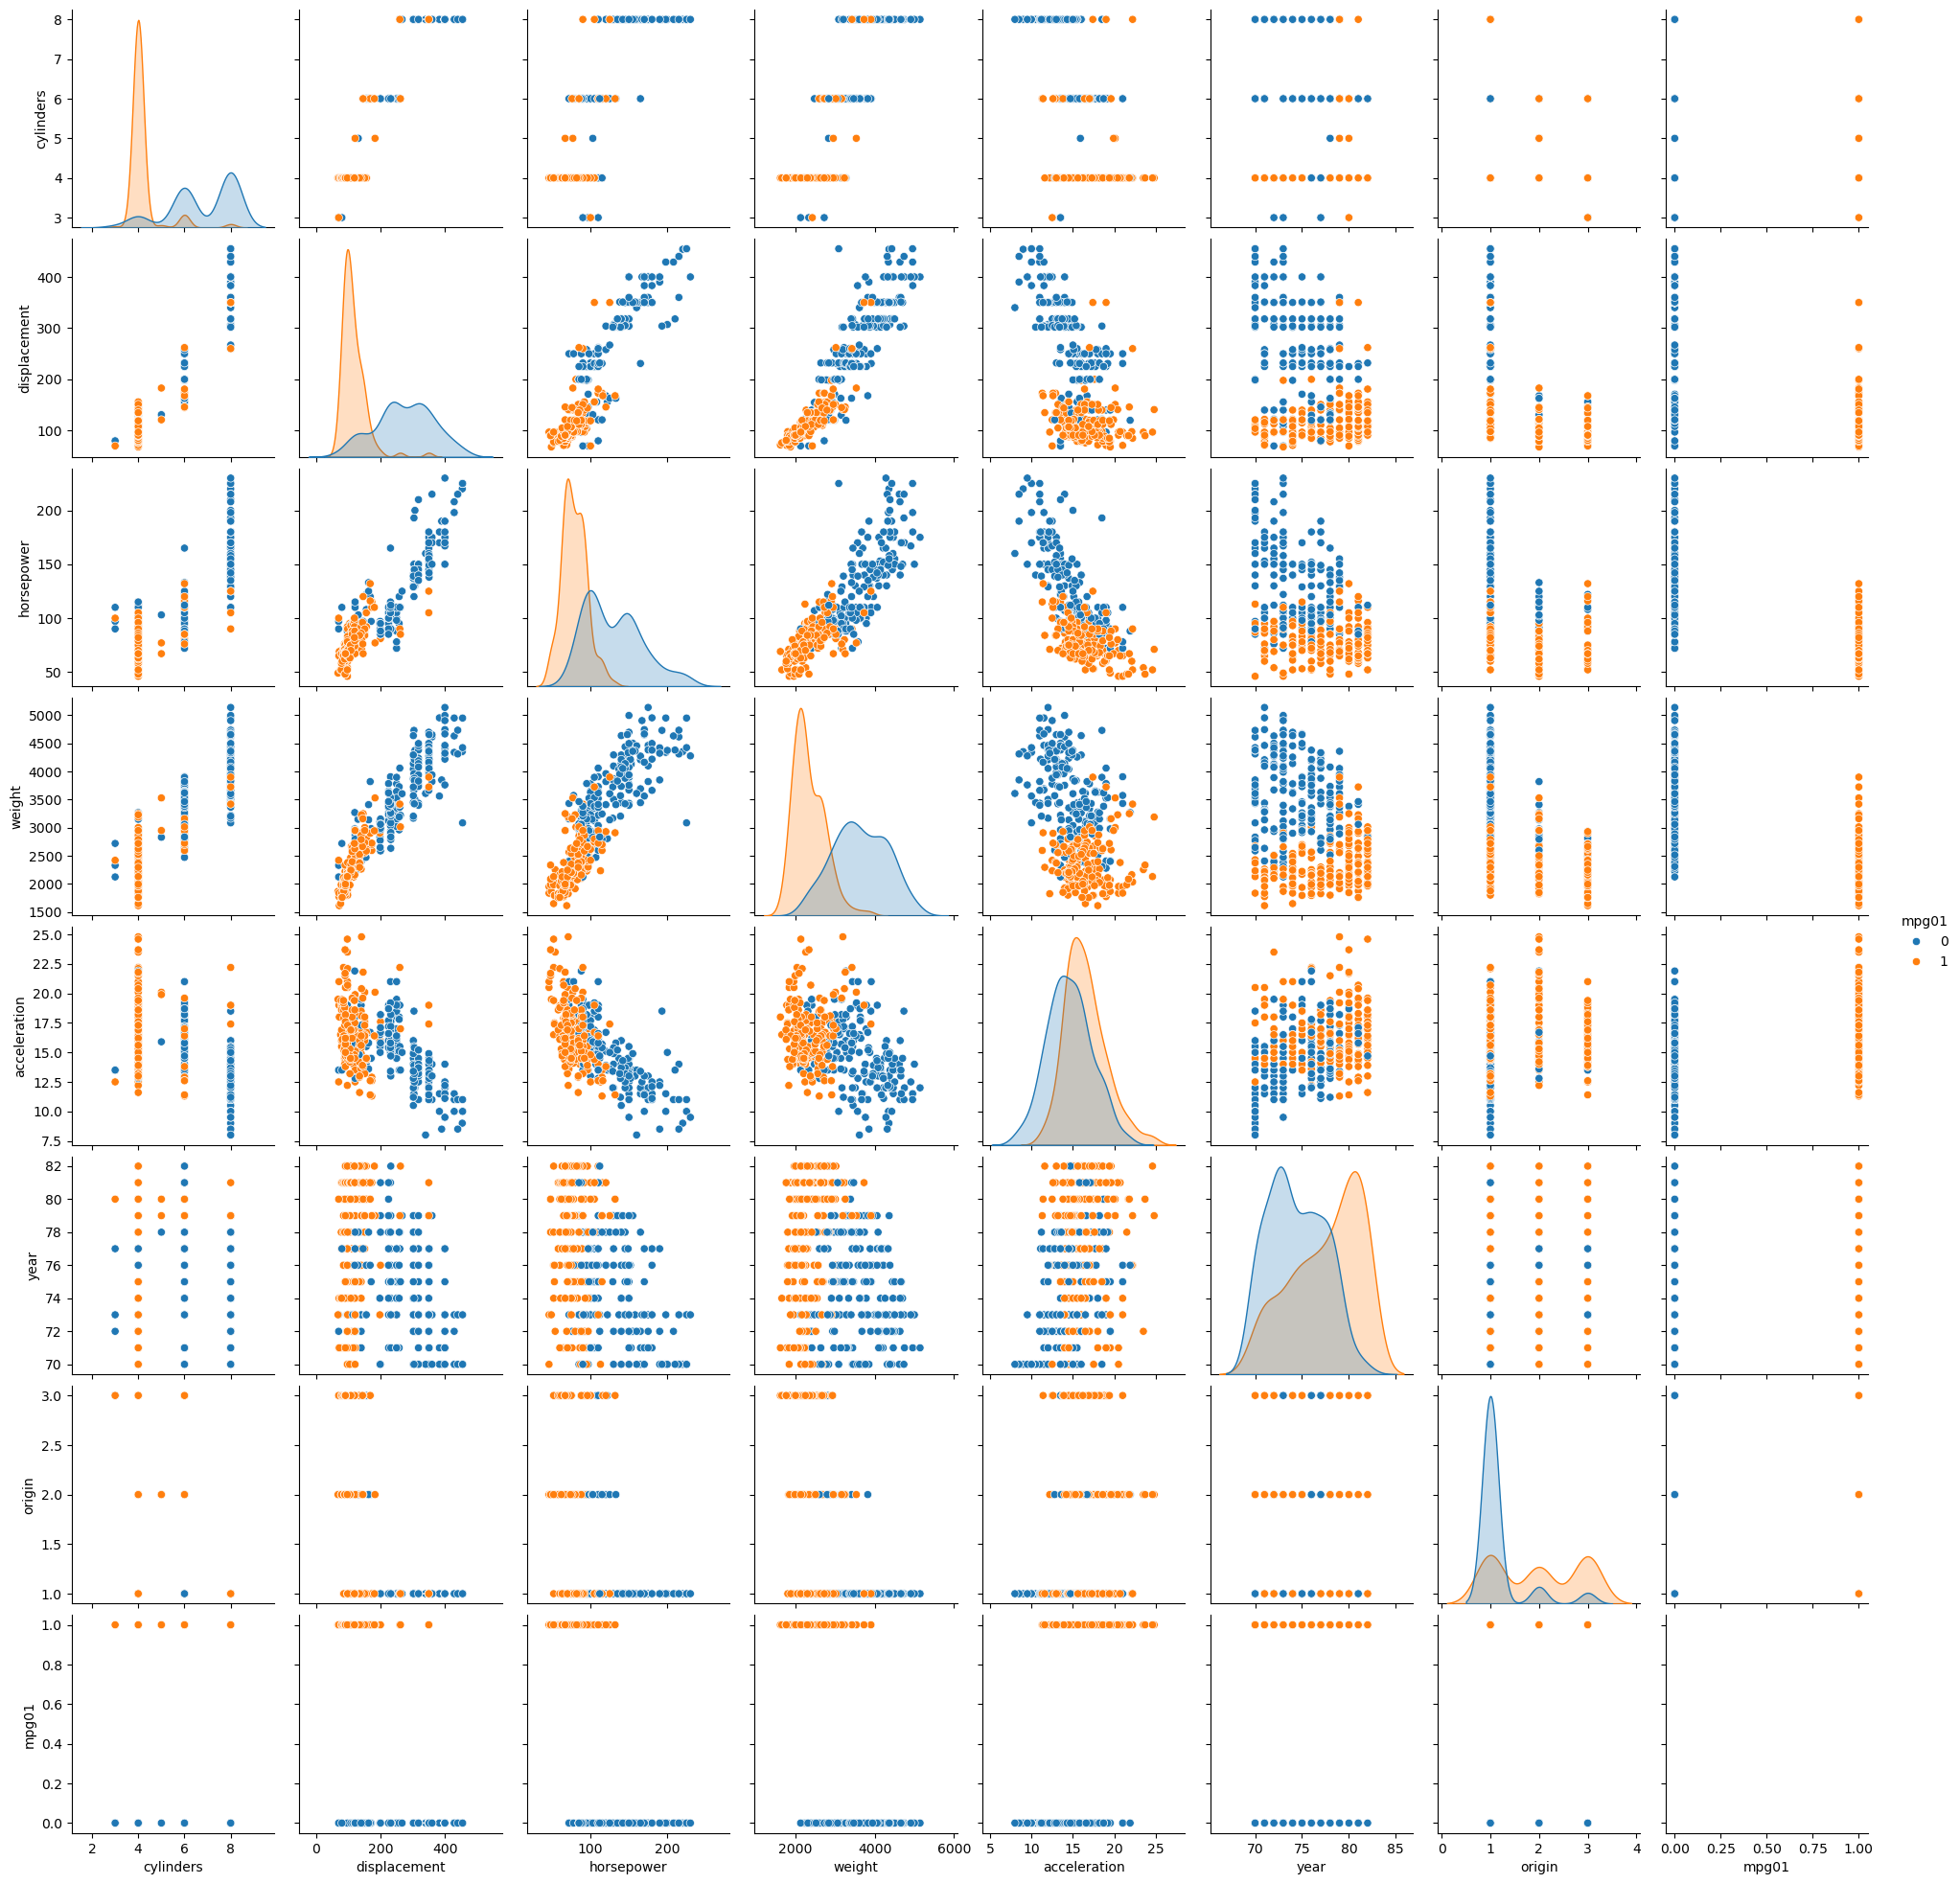

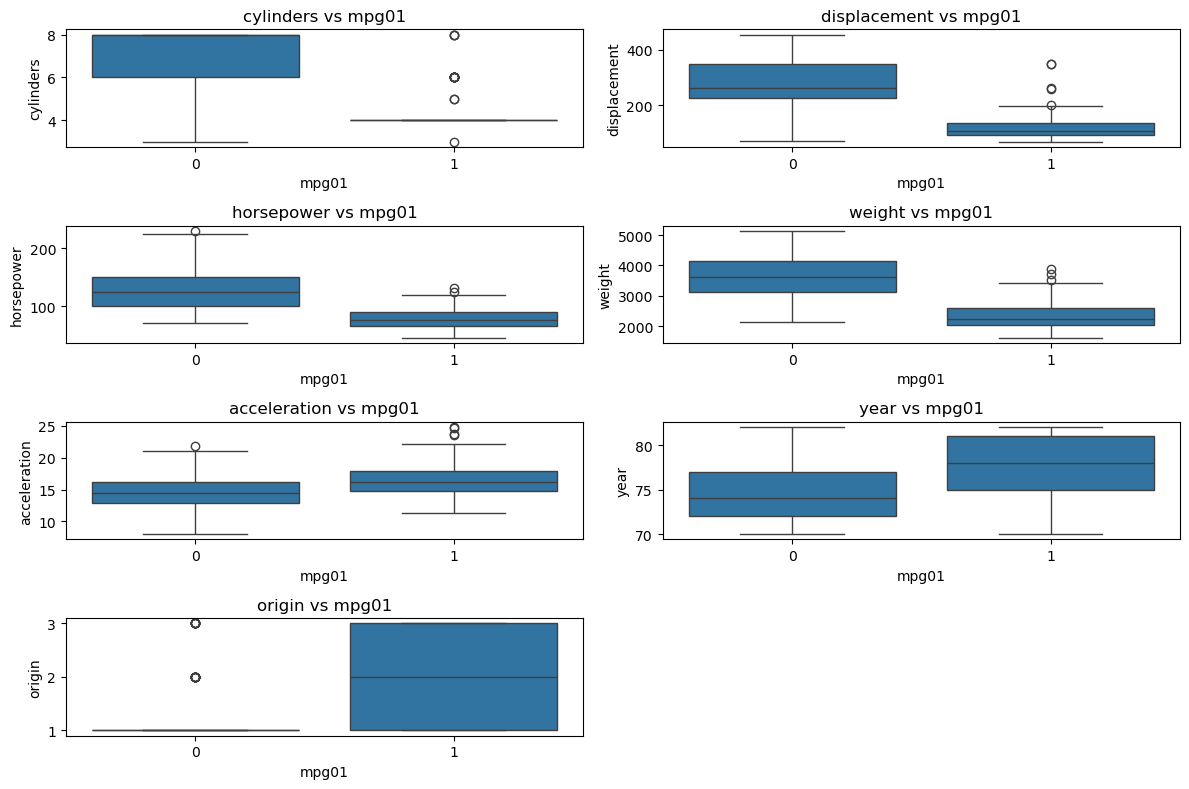

Horsepower, weight, acceleration, displacement seem most likely to be predicting mpg01


In [2]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.pairplot(Auto, hue='mpg01', vars=['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin', 'mpg01'])
plt.show()

plt.figure(figsize=(12, 8))
for i, col in enumerate(['cylinders', 'displacement', 'horsepower', 'weight', 'acceleration', 'year', 'origin']):
    plt.subplot(4, 2, i + 1)
    sns.boxplot(x='mpg01', y=col, data=Auto)
    plt.title(f'{col} vs mpg01')
plt.tight_layout()
plt.show()

print("Horsepower, weight, acceleration, displacement seem most likely to be predicting mpg01")

##### (c) Split the data into a training set and a test set.

In [3]:
from sklearn.model_selection import train_test_split

X = Auto[['horsepower', 'weight', 'acceleration', 'displacement']]
y = Auto['mpg01']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

##### (d) Perform LDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [4]:
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.metrics import accuracy_score

lda = LinearDiscriminantAnalysis()
lda.fit(X_train, y_train)
y_pred_lda = lda.predict(X_test)
lda_error = 1 - accuracy_score(y_test, y_pred_lda)
print(f"test error of LDA model: {lda_error:.4f}")

test error of LDA model: 0.1610


##### (e) Perform QDA on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [5]:
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis

qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)
qda_error = 1 - accuracy_score(y_test, y_pred_qda)
print(f"test error of QDA model: {qda_error:.4f}")

test error of QDA model: 0.1695


##### (f) Perform logistic regression on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [6]:
from sklearn.linear_model import LogisticRegression

log_reg = LogisticRegression()
log_reg.fit(X_train, y_train)
y_pred_log = log_reg.predict(X_test)
log_error = 1 - accuracy_score(y_test, y_pred_log)
print(f"test error of Logistic Regression model: {log_error:.4f}")

test error of Logistic Regression model: 0.1525


##### (g) Perform naive Bayes on the training data in order to predict mpg01 using the variables that seemed most associated with mpg01 in (b). What is the test error of the model obtained?

In [7]:
from sklearn.naive_bayes import GaussianNB

nb = GaussianNB()
nb.fit(X_train, y_train)
y_pred_nb = nb.predict(X_test)
nb_error = 1 - accuracy_score(y_test, y_pred_nb)
print(f"test error of Naive Bayes model: {nb_error:.4f}")

test error of Naive Bayes model: 0.1695


##### (h) Perform KNN on the training data, with several values of K, in order to predict mpg01. Use only the variables that seemed most associated with mpg01 in (b). What test errors do you obtain? Which value of K seems to perform the best on this data set?

In [8]:
from sklearn.neighbors import KNeighborsClassifier

for k in range(1, 11):
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred_knn = knn.predict(X_test)
    knn_error = 1 - accuracy_score(y_test, y_pred_knn)
    print(f"test error of KNN (K={k}) model: {knn_error:.4f}")

test error of KNN (K=1) model: 0.1525
test error of KNN (K=2) model: 0.1525
test error of KNN (K=3) model: 0.1356
test error of KNN (K=4) model: 0.1441
test error of KNN (K=5) model: 0.1610
test error of KNN (K=6) model: 0.1525
test error of KNN (K=7) model: 0.1695
test error of KNN (K=8) model: 0.1695
test error of KNN (K=9) model: 0.1695
test error of KNN (K=10) model: 0.1695
